<a href="https://colab.research.google.com/github/salmankhaliq22/10-Time-Series-Analysis/blob/main/Dimensionality_reduction_modeling_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RFE for Regression

- Here we are using data from sklearn.datasets and would be using diabetes dataset for regression models, you can check out the details in the [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

In [21]:
import pandas as pd
df = pd.read_csv('AAPL.csv', index_col = 'DATE', parse_dates = True)
df.columns

Index(['Open', 'Close', 'Volume', 'Prev_Open', 'Prev_Close', 'Prev_Vol',
       'daily_returns', 'Weekday', '5SMA', '10SMA', '20SMA', '50SMA', '100SMA',
       '200SMA', 'MACD', 'MACD_signal', 'RSI', 'RSI_Volume', 'Upper_band',
       'Lower_band', '1d_Prev_Close', '1d_Prev_Vol', '1d_5SMA', '1d_10SMA',
       '1d_20SMA', '1d_50SMA', '1d_100SMA', '1d_200SMA', '1d_MACD',
       '1d_MACD_signal', '1d_RSI', '1d_RSI_Volume', '1d_Upper_band',
       '1d_Lower_band', '2d_Prev_Close', '2d_Prev_Vol', '2d_5SMA', '2d_10SMA',
       '2d_20SMA', '2d_50SMA', '2d_100SMA', '2d_200SMA', '2d_MACD',
       '2d_MACD_signal', '2d_RSI', '2d_RSI_Volume', '2d_Upper_band',
       '2d_Lower_band', '5d_Prev_Close', '5d_Prev_Vol', '5d_5SMA', '5d_10SMA',
       '5d_20SMA', '5d_50SMA', '5d_100SMA', '5d_200SMA', '5d_MACD',
       '5d_MACD_signal', '5d_RSI', '5d_RSI_Volume', '5d_Upper_band',
       '5d_Lower_band', '10d_Prev_Close', '10d_Prev_Vol', '10d_5SMA',
       '10d_10SMA', '10d_20SMA', '10d_50SMA', '10d_100SMA

In [23]:
X = df[['Prev_Open', 'Prev_Close', '5SMA', 'MACD', '2d_Prev_Vol', 'daily_returns', 'Upper_band'
        , '10SMA', '1d_Prev_Vol', 'Prev_Vol', 'GVZCLS', 'DEXUSEU', 'Lower_band', 'MACD_signal'
        , '2d_RSI', '50SMA', '20SMA', '5d_Prev_Vol', '10d_RSI', '1d_RSI', 'RSI', '2d_Prev_Close'
        , 'DEXJPUS', '200SMA', '10d_Prev_Vol', '2d_5SMA', '1d_Upper_band', 'DCOILBRENTEU']].copy()
y = df['Close'].copy()


In [24]:
# Lets look at the head of the X variable , which contains the features
X.head()

,Prev_Open,Prev_Close,5SMA,MACD,2d_Prev_Vol,daily_returns,Upper_band,10SMA,1d_Prev_Vol,Prev_Vol,...,10d_RSI,1d_RSI,RSI,2d_Prev_Close,DEXJPUS,200SMA,10d_Prev_Vol,2d_5SMA,1d_Upper_band,DCOILBRENTEU
DATE,,,,,,,,,,,,,,,,,,,,,
2008-06-04,6.673571,6.620357,6.670857,0.166305,0.229989,-0.003923,6.863812,6.580929,0.103966,7.505204e+08,...,-0.054854,-0.018504,57.484047,-0.017907,105.29,5.676195,-0.206487,0.004161,0.000144,126.28
2008-06-05,6.572143,6.613929,6.657857,0.154645,0.069345,-0.000971,6.860104,6.578393,-0.031361,7.269836e+08,...,-0.090112,-0.004889,57.202994,-0.004890,104.99,5.687468,-0.250416,-0.003080,-0.000540,121.72
2008-06-06,6.655000,6.765357,6.677429,0.155827,0.006562,0.022895,6.876954,6.618536,0.039151,7.554456e+08,...,0.170872,0.082557,61.925510,0.021902,106.00,5.699470,-0.347436,0.000985,0.002456,122.36
2008-06-09,6.714286,6.630000,6.655214,0.144179,0.329360,-0.020007,6.877852,6.649214,0.279275,9.664228e+08,...,0.085196,-0.096023,55.979232,0.002430,105.33,5.709839,-0.199143,-0.000397,0.000131,132.81
2008-06-10,6.599643,6.486071,6.623143,0.121929,1.499707,-0.021709,6.880449,6.650786,0.954003,1.888393e+09,...,-0.096550,-0.099065,50.433633,-0.041282,106.06,5.718607,1.082211,-0.008130,0.000377,134.43


In [25]:
# Lets do the same for the target variable
y.head()

DATE
2008-06-04    6.613929
2008-06-05    6.765357
2008-06-06    6.630000
2008-06-09    6.486071
2008-06-10    6.630000
Name: Close, dtype: float64

In [26]:
# evaluate RFE for Regression
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

# create pipeline
rfe = RFE(estimator = DecisionTreeRegressor(), n_features_to_select = 4)
model = DecisionTreeRegressor()
pipeline = make_pipeline(rfe, model)

# evaluate model
cv = KFold(n_splits = 4)
n_scores = cross_val_score(pipeline, X, y, scoring = 'neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -15.071 (21.195)


In [27]:
# evaluate RFE for Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

# Create the RFE object and compute a cross-validated score.
min_features_to_select = 1  # Minimum number of features to consider
cv = KFold(n_splits = 6)
rfecv = RFECV(estimator = DecisionTreeRegressor(), step = 1, cv = cv, scoring = 'neg_mean_absolute_error', min_features_to_select = min_features_to_select)
rfecv.fit(X, y)
model = DecisionTreeRegressor()
pipeline = make_pipeline(rfecv, model)

# evaluate model
cv = KFold(n_splits = 6)
n_scores = cross_val_score(pipeline, X, y, scoring = 'neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print("Optimal number of features : %d" % rfecv.n_features_)
# print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Optimal number of features : 25


In [28]:
# summarize the selection of the attributes
print(rfecv.support_)

[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True False  True
  True  True  True  True]


In [29]:
# summarize the ranking of the attributes
fea_rank_ = pd.DataFrame({'cols':X.columns, 'fea_rank':rfecv.ranking_})
fea_rank_.loc[fea_rank_.fea_rank > 0].sort_values(by=['fea_rank'], ascending = True)

,cols,fea_rank
0,Prev_Open,1
25,2d_5SMA,1
24,10d_Prev_Vol,1
23,200SMA,1
21,2d_Prev_Close,1
19,1d_RSI,1
18,10d_RSI,1
17,5d_Prev_Vol,1
16,20SMA,1
15,50SMA,1


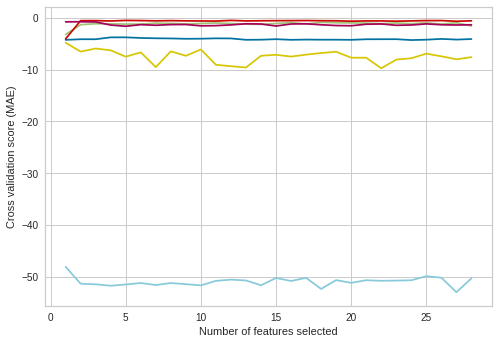

In [30]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (MAE)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

[Reference](https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html)

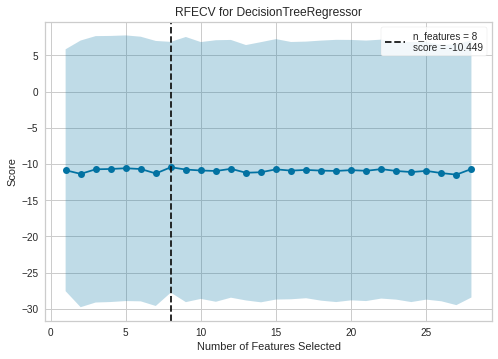

In [31]:
from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a DecisionTreeRegressor
min_features_to_select = 10
cv = KFold(n_splits = 6)
rfecv = RFECV(estimator = DecisionTreeRegressor(), step = 1, cv = cv, scoring = 'neg_mean_absolute_error', min_features_to_select = min_features_to_select)
visualizer = rfecv

# print("Optimal number of features : %d" % rfecv.n_features_)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## Dimensionality Reduction

In [32]:
import pandas as pd
df = pd.read_csv('AAPL.csv', index_col = 'DATE', parse_dates = True)
X = df.drop(['Open', 'Close', 'Volume'], axis=1)
y = df['Close']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 22)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.15, random_state = 22)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
X_train_reduced = pca.fit_transform(X_train_std)
X_train_reduced

array([[ 0.77777112, -1.1072998 , -1.52495257, ..., -0.82278681,
        -0.40313656, -0.21804445],
       [-5.26410882, -3.15325151, -1.20345282, ...,  0.50073853,
         0.66177511,  1.39249964],
       [ 0.38916325, -2.34298324,  0.9162748 , ..., -0.3987408 ,
        -1.39974383,  0.68861864],
       ...,
       [ 2.71442573, -3.51152246,  6.89113161, ..., -0.57376631,
         0.10010326, -0.88141325],
       [ 1.95578428, -0.52723828, -2.69088013, ..., -0.96994425,
        -0.38624072, -0.08616727],
       [15.72059623, -4.33589229,  4.61701145, ...,  1.13075354,
        -0.36835776, -1.48386445]])

In [42]:
print(pca.explained_variance_ratio_.cumsum())

[0.24913235 0.39768042 0.51621825 0.58631949 0.63562541 0.67615272
 0.70824766 0.7338576  0.75589352 0.7743485  0.78972709 0.80402339
 0.81771686 0.83113549 0.84420745 0.85713685 0.87005323 0.88279596
 0.89532453 0.90743207 0.91876101 0.92983203 0.93947965 0.94883396
 0.95647369]


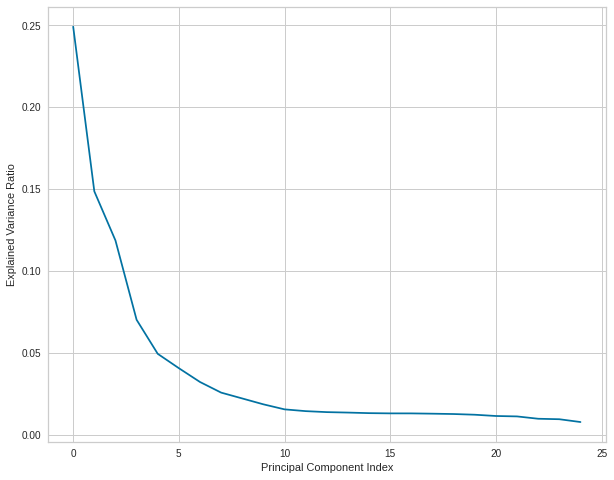

In [43]:
var = pca.explained_variance_ratio_
plt.figure(figsize = (10,8))
plt.plot(var)
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [69]:
!pip install xgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement xgb (from versions: none)
ERROR: No matching distribution found for xgb


In [95]:
# import multiple models 
from time import time
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error
import seaborn as sns

# create a list of these models
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LGBMRegressor(),
    XGBRegressor(objective='reg:squarederror', n_estimators=10, seed = 22),
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet()
    ]

In [96]:
X_valid_std = scaler.transform(X_valid)
X_valid_reduced = pca.transform(X_valid)

In [97]:
# loops through models and record their performance 
head = 12
for model in regressors[:head]:
    start = time()
    model.fit(X_train_reduced, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_valid_reduced)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_valid, y_pred))
    print('\tRMSE: %f' % np.sqrt(mean_squared_error(y_valid, y_pred)))
    print("\tMean absolute error:", mean_absolute_error(y_valid, y_pred))
    print("\tR2 score:", r2_score(y_valid, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.001s
	Prediction time: 0.025s
	Explained variance: 2.220446049250313e-16
	RMSE: 59.680497
	Mean absolute error: 40.1005854807637
	R2 score: -0.8223953128043051

GradientBoostingRegressor()
	Training time: 2.040s
	Prediction time: 0.001s
	Explained variance: 0.0
	RMSE: 70.208360
	Mean absolute error: 54.541489603922386
	R2 score: -1.5220598143778474

ExtraTreesRegressor()
	Training time: 1.423s
	Prediction time: 0.010s
	Explained variance: 0.0
	RMSE: 57.462413
	Mean absolute error: 37.07253351845283
	R2 score: -0.6894504354309159

RandomForestRegressor()
	Training time: 4.081s
	Prediction time: 0.011s
	Explained variance: 0.0
	RMSE: 58.637518
	Mean absolute error: 38.6240406637002
	R2 score: -0.7592553898214698

DecisionTreeRegressor()
	Training time: 0.070s
	Prediction time: 0.001s
	Explained variance: 0.0
	RMSE: 59.545993
	Mean absolute error: 39.90572017640643
	R2 score: -0.8141901700018894

LGBMRegressor()
	Training time: 0.636s
	Prediction ti

## Hyperparameter Tuning

Fitting 10 folds for each of 84 candidates, totalling 840 fits
Best parameters found: {'learning_rate': 0.1, 'n_estimators': 350, 'subsample': 0.5}
Lowest RMSE found: 3.656886711120419

In [91]:
# grid search
model = XGBRegressor(objective='reg:squarederror', seed = 22)
# n_estimators = range(50, 400, 50)
param_grid = {'learning_rate': [0.01, 0.1, 0.5, 0.9],
              'n_estimators': range(50, 400, 50),
              'subsample':[0.3, 0.5, 0.9]}
              # Best learning rate turns out to be 0.5 out of 'learning_rate': [0.01, 0.1, 0.5, 0.9]
              # best n_estimator turns out to be 350 out of 'n_estimators': range(50, 400, 50)
              # best subsample turns out to be 
# dict(n_estimators=n_estimators)
kfold = KFold(n_splits=10)
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reduced, y_train)
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print('Best parameters found:', grid_result.best_params_)
print('Lowest RMSE found:', np.sqrt(np.abs(grid_result.best_score_)))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# 	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
# plt.errorbar(n_estimators, means, yerr=stds)
# plt.title("XGBoost n_estimators vs RMSE")
# plt.xlabel('n_estimators')
# plt.ylabel('RMSE')
# plt.savefig('n_estimators.png')

Fitting 10 folds for each of 84 candidates, totalling 840 fits
Best parameters found: {'learning_rate': 0.1, 'n_estimators': 350, 'subsample': 0.5}
Lowest RMSE found: 3.656886711120419


In [94]:
for mean, stdev, param in zip(means, stds, params):
  print('%.2f   (%.2f)    with %r' % (mean, stdev, param))

-1414.33   (271.11)    with {'learning_rate': 0.01, 'n_estimators': 50, 'subsample': 0.3}
-1405.25   (268.90)    with {'learning_rate': 0.01, 'n_estimators': 50, 'subsample': 0.5}
-1399.67   (269.69)    with {'learning_rate': 0.01, 'n_estimators': 50, 'subsample': 0.9}
-609.67   (116.56)    with {'learning_rate': 0.01, 'n_estimators': 100, 'subsample': 0.3}
-602.04   (115.47)    with {'learning_rate': 0.01, 'n_estimators': 100, 'subsample': 0.5}
-598.90   (116.07)    with {'learning_rate': 0.01, 'n_estimators': 100, 'subsample': 0.9}
-289.33   (54.84)    with {'learning_rate': 0.01, 'n_estimators': 150, 'subsample': 0.3}
-285.31   (53.71)    with {'learning_rate': 0.01, 'n_estimators': 150, 'subsample': 0.5}
-285.56   (53.75)    with {'learning_rate': 0.01, 'n_estimators': 150, 'subsample': 0.9}
-156.27   (28.98)    with {'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.3}
-154.59   (28.52)    with {'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.5}
-156.36   (28.9